# Proyecto Análisis De Redes Sociales

Como no dispongo de los permisos en Twitter para capturar los datos, voy a utilizar el fichero csv que se nos proporciona como punto de partida y paso directamente a la parte 2 del proyecto.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
pip install networkx

In [3]:
!wget https://www.dropbox.com/s/zk6xzsltunswmho/trump_graph.csv?dl=0 -O trump_graph.csv

--2021-10-12 19:04:15--  https://www.dropbox.com/s/zk6xzsltunswmho/trump_graph.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zk6xzsltunswmho/trump_graph.csv [following]
--2021-10-12 19:04:15--  https://www.dropbox.com/s/raw/zk6xzsltunswmho/trump_graph.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0bf493a005222b220e3cffdee6.dl.dropboxusercontent.com/cd/0/inline/BX45klt-eOBfH8qeL3UHAHTL087i8LKHJtHJq9nOIJQqmN9Oc4zCow4MD0a_GtvIL2NRmYwZQWuyg0By6MlCSA_KaErZE07Kms2IrUwpjdQ0LKVkzhOJIsmEhksQqKT7G1LfkuW1E7kVCNTh0LycvKfx/file# [following]
--2021-10-12 19:04:16--  https://uc0bf493a005222b220e3cffdee6.dl.dropboxusercontent.com/cd/0/inline/BX45klt-eOBfH8qeL3UHAHTL087i8LKHJtHJq9nOIJQqmN9Oc4zCow4MD0a_GtvIL2NRmYwZQWu

Visualizo el fichero para asegurarme de que se ha descargado correctamente.

In [4]:
df = pd.read_csv('trump_graph.csv')
df.head()

,1926686233 17995040
0,2815015437 840502412842541056
1,2720334798 1403264108
2,307038725 1339835893
3,3356706339 398172747
4,1104945319 1169016223755096064


## Ejercicio 1

In [5]:
G = nx.read_edgelist('trump_graph.csv', create_using=nx.Graph(), nodetype=int)

In [6]:
len(G.nodes)

52087

In [7]:
len(G.edges)

99231

## Ejercicio 2

In [8]:
deg_min=15
dg = G.degree
nodes = [k[0] for k in dg if k[1]>=deg_min]
G_simple = G.subgraph(nodes)

In [9]:
print(nx.info(G))

Graph with 52087 nodes and 99231 edges


In [10]:
nx.density(G)

7.315213611657281e-05

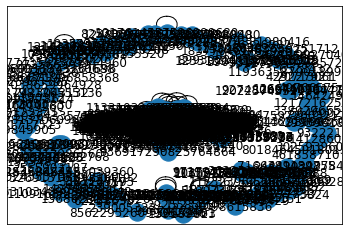

In [17]:
nx.draw_networkx(G_simple)

## Ejercicio 3

In [19]:
largest_cc = max(nx.connected_components(G_simple), key=len)

In [20]:
H = G.subgraph(largest_cc)

## Ejercicio 4

In [35]:
dg = nx.degree_centrality(H)
pos = nx.spring_layout(H)

In [23]:
def sort_centrality(centrality):
    return sorted(centrality.items(), key=lambda x: x[1], reverse=True)

In [24]:
sort_centrality(dg)[0:10]

[(25073877, 0.2164869029275809),
 (939091, 0.15485362095531588),
 (3223426134, 0.07550077041602465),
 (1917731, 0.07473035439137134),
 (2836421, 0.0724191063174114),
 (21619519, 0.0716486902927581),
 (288277167, 0.0662557781201849),
 (1243560408025198592, 0.06548536209553159),
 (38936142, 0.06471494607087827),
 (225265639, 0.06240369799691834)]

In [25]:
pr = nx.pagerank(H)
sort_centrality(pr)[:10]

[(25073877, 0.014042940014167778),
 (939091, 0.008930756424400922),
 (1917731, 0.004432571531582784),
 (21619519, 0.004214631255977376),
 (3223426134, 0.004153777138685881),
 (2836421, 0.0041031893404830065),
 (288277167, 0.0037236614475399292),
 (1243560408025198592, 0.0036285099057783055),
 (225265639, 0.0035011247432638524),
 (38936142, 0.003496449299673541)]

Dan valores similares

In [32]:
bt_fb = nx.betweenness_centrality(H)
sort_centrality(bt_fb)[:10]

[(25073877, 0.3158140564725842),
 (939091, 0.08854426366507193),
 (1917731, 0.040582556932208025),
 (21619519, 0.02594563589976007),
 (822215679726100480, 0.025930835524576562),
 (750299424513990656, 0.024043320370602122),
 (4541141723, 0.020889899407087614),
 (2980625739, 0.020530544369436122),
 (2430341433, 0.01861432537129908),
 (29501253, 0.018367876696900216)]

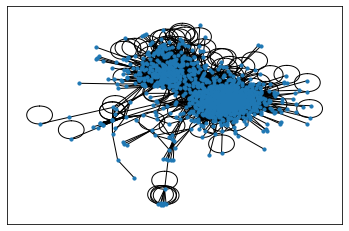

In [42]:
nx.draw_networkx(H, pos=pos, with_labels=False, node_size=10)

In [33]:
top = 10 # dibuja los 10 nodos con mayor centralidad

bt_fb_sorted = sort_centrality(bt_fb)[:10]

bt_values = [0]*len(H.nodes())
bt_colors = [0]*len(H.nodes())

for max_id, max_bt in bt_fb_sorted[:top]:
    bt_values[max_id] = 500*max_bt
    bt_colors[max_id] = 2
    

IndexError: ignored

NetworkXError: ignored

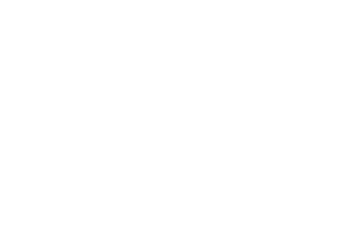

In [37]:
plt.axis('off')
h = nx.draw_networkx(G_simple, pos = pos,
    cmap = plt.get_cmap("rainbow"),
    node_color = [0]*len(H.nodes()),
    node_size = [2]*len(H.nodes()),
    with_labels = False)
# Dibujamos todos los puntos otra vez, pero ahora
# la mayoría tienen diámetro 0 y los 10 con mayor
# centralidad tienen diámetro proporcional a su valor
h = nx.draw_networkx(G_fb, pos = pos,
    cmap = plt.get_cmap("rainbow"),
    node_color = bt_colors,
    node_size = bt_values, 
    with_labels = False)